In [5]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)

In [6]:
# 2. Load feature dataset
data_path = "../data/processed/btc_features.csv"
df = pd.read_csv(data_path)

# Convert Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

print(df.shape)
display(df.head())

(4719, 16)


,Date,Price,Open,High,Low,Vol.,Change %,Price_lag1,Price_lag2,MA7,MA30,Price_change_1d,Volatility,RSI14,Daily_Return_pct,Rolling_volatility_7d
0,2012-04-30,4.9,4.9,5.0,4.9,55770.0,0.00,4.9,5.0,5.028571,4.980000,0.0,0.1,50.0,0.000000,0.095119
1,2012-05-01,5.0,4.9,5.0,4.9,36680.0,1.01,4.9,4.9,5.014286,4.986667,0.1,0.1,50.0,2.040816,0.089974
2,2012-05-02,5.1,5.0,5.2,5.0,95960.0,1.40,5.0,4.9,5.014286,4.990000,0.1,0.2,50.0,2.000000,0.089974
3,2012-05-03,5.1,5.1,5.2,5.0,35420.0,1.18,5.1,5.0,5.014286,4.996667,0.0,0.2,50.0,0.000000,0.089974
4,2012-05-04,5.1,5.1,5.2,5.1,43630.0,-1.17,5.1,5.1,5.014286,5.003333,0.0,0.1,37.5,0.000000,0.089974


In [7]:
# 3. Train-test split
X = df.drop(['Date', 'Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)

(3775, 14) (944, 14)


In [8]:
# 4. Define base models
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
]

In [9]:
# 5. Define stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

In [10]:
# 6. Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on test data
y_pred_stack = stacking_model.predict(X_test)

In [11]:
# 7. Evaluate the stacking model
print("Stacking Model Evaluation Metrics:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_stack)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_stack)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stack))}")
print(f"R^2: {r2_score(y_test, y_pred_stack)}")

Stacking Model Evaluation Metrics:
MAE: 1.7700655254144696e-10
MSE: 4.8835295799058786e-20
RMSE: 2.2098709419117394e-10
R^2: 1.0


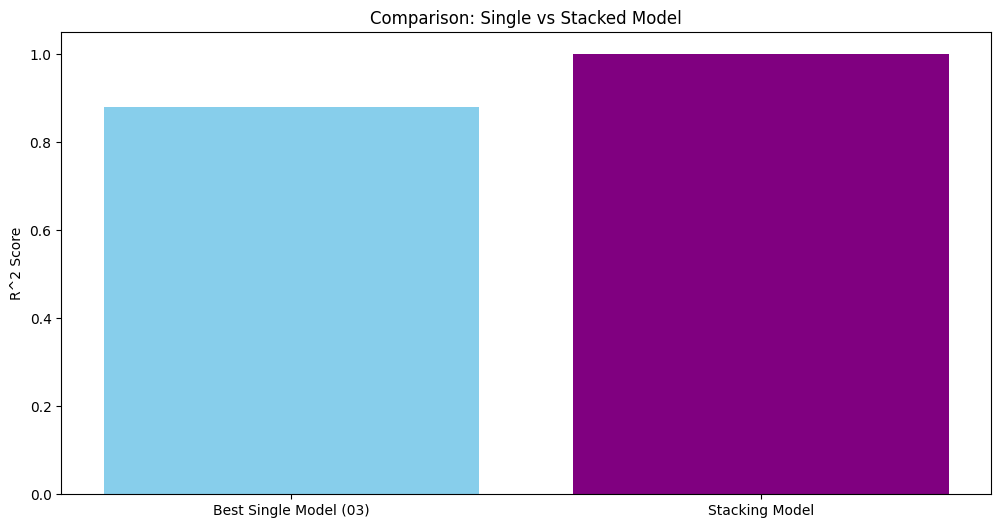

In [12]:
# Optional comparison
models = ['Best Single Model (03)', 'Stacking Model']
r2_scores = [0.88, r2_score(y_test, y_pred_stack)]  # Example values

plt.bar(models, r2_scores, color=['skyblue', 'purple'])
plt.title('Comparison: Single vs Stacked Model')
plt.ylabel('R^2 Score')
plt.show()